In [37]:
import numpy as np
import matplotlib.pyplot as plt

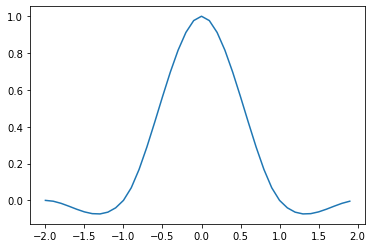

In [38]:
def BiCubicInterpolator(x):
    if x < 0:
        x = -x
    biCoef = 0
    if x<=1:
        biCoef = 1.5*x**3 - 2.5*x**2 + 1
    elif x<=2:
        biCoef = -0.5*x**3 + 2.5*x**2 - 4*x + 2
    return biCoef

arr = np.arange(-2,2,0.1)
arr2 = np.array([BiCubicInterpolator(x) for x in arr])
plt.plot(arr,arr2)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

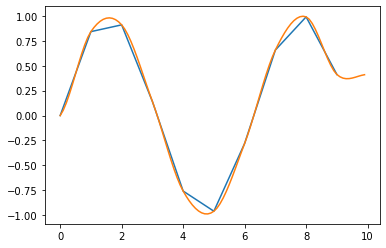

In [39]:
def CubicInterpo(src, pos):
    oy = int(pos)  # 取整
    dy = pos - oy # 取小数
    if dy == 0:
        return src[oy]
    grayValue = 0 # 初始化
    for n in range(-1,3): # 取-1,0,1,2
        k1 = BiCubicInterpolator(dy - n) # 取插值系数
        oy2 = np.clip(oy + n, 0, len(src) - 1) # 取边界值
        grayValue += k1 * src[oy2] # 插值
    return grayValue # 返回插值结果

x = np.arange(0,  10,  1) 
y_sin = np.sin(x)

x2 = np.arange(0,10,0.1)
y_sin2 = np.array([CubicInterpo(y_sin, p) for p in x2])

plt.plot(x, y_sin)
plt.plot(x2, y_sin2)
plt.show

In [40]:
def CubicInterpo2(src, x, y):
    ox = int(x)
    oy = int(y)
    dx = x - ox
    dy = y - oy
    if dx == 0 and dy == 0:
        return src[oy, ox]
    grayValue = 0
    for n in range(-1, 3):
        k1 = BiCubicInterpolator(dy - n)
        oy2 = np.clip(oy + n, 0, len(src[0]) - 1)
        for m in range(-1, 3):
            k2 = BiCubicInterpolator(m - dx)
            ox2 = np.clip(ox + m, 0, len(src[0]) - 1)
            grayValue += k1 * k2 * src[oy2, ox2]
    return grayValue

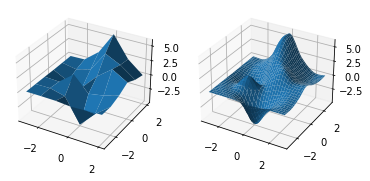

In [42]:
def Peaks(x, y):
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

x = np.arange(-3,3,1)
y = np.arange(-3,3,1)
x_2d, y_2d = np.meshgrid(x, y)
z = Peaks(x_2d, y_2d)

x2 = np.arange(-3,3,0.1)
y2 = np.arange(-3,3,0.1)

z2 = np.empty((len(y2), len(x2)))
for yi,yy in enumerate(y2):
    for xi,xx in enumerate(x2):
        z2[yi, xi] = CubicInterpo2(z, xx+3, yy+3)

fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_2d, y_2d, z)


x_2d2, y_2d2= np.meshgrid(x2, y2)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_2d2, y_2d2, z2)

plt.show()